In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import seaborn as sns


plt.rcParams['axes.unicode_minus']=False # 显示负数
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文

In [4]:
data = pd.read_csv('data_set.txt', header=None, names=['x1', 'x2', 'y'])
data

,x1,x2,y
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


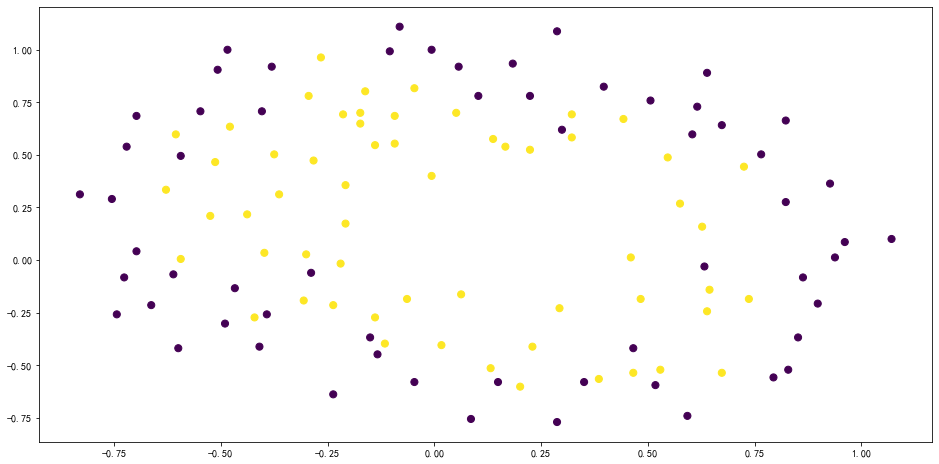

In [63]:
plt.figure(figsize=(16, 8))
plt.scatter(data['x1'], data['x2'], c=y, s=50)
plt.show()

In [78]:
x = data.iloc[:, :2].values
y = data['y'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=20)

clf = svm.SVC(kernel='rbf')
clf_model = clf.fit(x_train, y_train)
y_pre = clf.predict(x_test)

In [79]:
cm = confusion_matrix(y_test, y_pre, labels=[1, 0])
print(cm)

[[16  5]
 [ 3 12]]


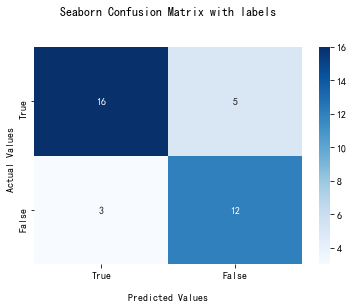

In [80]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(["True", "False"])
ax.yaxis.set_ticklabels(["True", "False"])
plt.show()

In [81]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.84      0.76      0.80        21

    accuracy                           0.78        36
   macro avg       0.77      0.78      0.78        36
weighted avg       0.79      0.78      0.78        36



In [103]:
TrueColor = ['red'if i==0 else 'blue'  for i in y_test.tolist()]
PreColor = ['black'if i==0 else 'green'  for i in y_pre.tolist()]

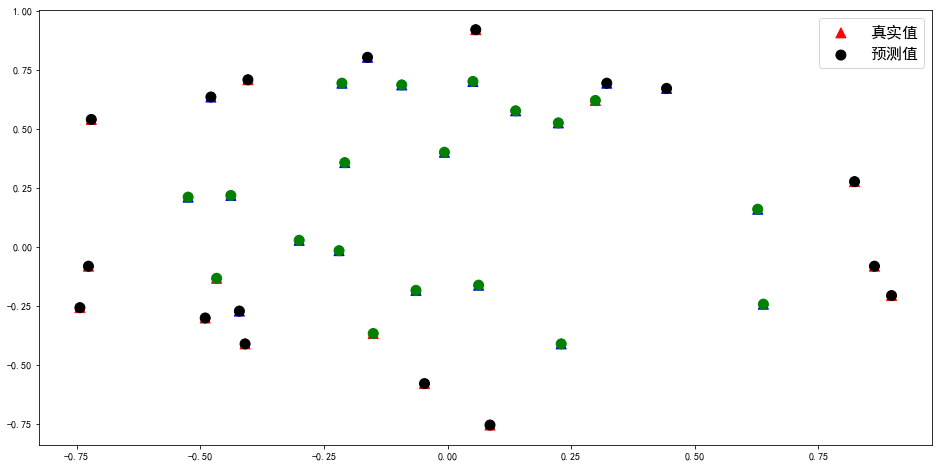

In [104]:
plt.figure(figsize=(16, 8))
plt.scatter(x_test[:, 0], x_test[:, 1], c=TrueColor, s=100, marker='^', label='真实值')
plt.scatter(x_test[:, 0], x_test[:, 1], c=PreColor, s=100, marker='o', label='预测值')
plt.legend(fontsize=16)
plt.show()

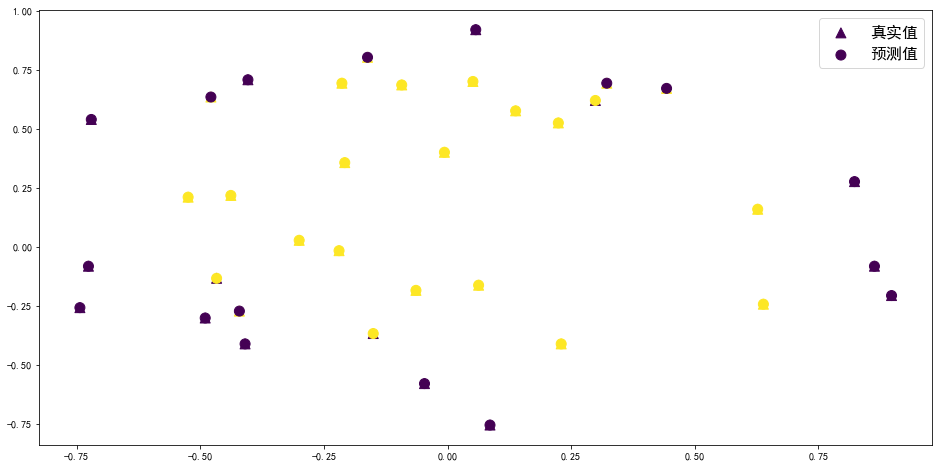

In [105]:
plt.figure(figsize=(16, 8))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, marker='^', label='真实值')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pre, s=100, marker='o', label='预测值')
plt.legend(fontsize=16)
plt.show()